In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import Dataset
df = pd.read_csv ('/content/drive/MyDrive/PROJECT/final_project/Dataset9_Diabetes_Prediction.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [4]:
#Exploratory Data Analysis (EDA)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing


### Missing Values

In [7]:
#Missing Values
df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dapat diketahui bahwa terdapat nilai yang hilang diberi tanda '0'. Maka dari itu, harus direplace dengan NaN value sebelum memulai proses imputasi

In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Menampilkan Nilai NaN
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Selanjutnya adalah mengganti nilai 0 denngan NaN Values sehingga dapat melakukan proses imputasi dengan menambahkan nilai median untuk setiap kolom.

# Data Vizualization

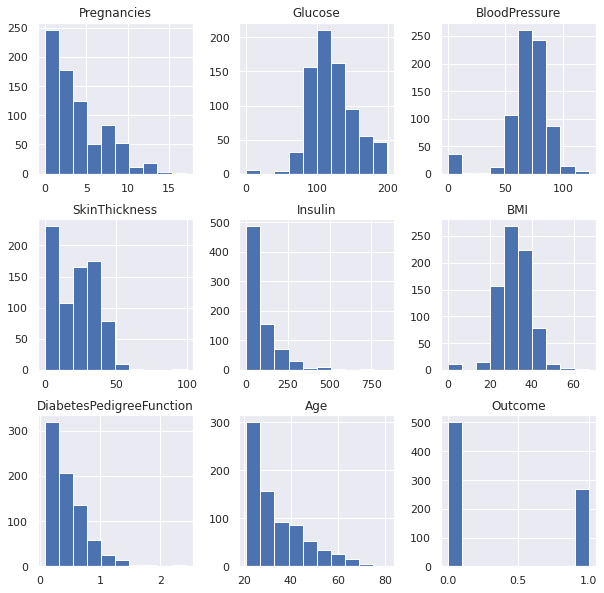

In [10]:
p = df.hist(figsize = (10,10))

In [11]:
#Computing Mean Value
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
print(df_copy)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

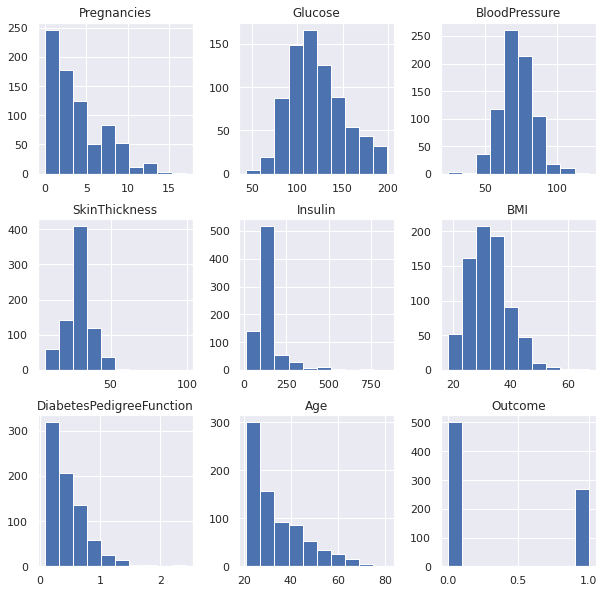

In [12]:
#Plotting The Distribution

p = df_copy.hist(figsize = (10,10))

Visualisasi ini dilakukan untuk melihat persebaran dataset yang nilai null valeusnya sudah diubah. Kita dapat melihat spike 50-100.

0    500
1    268
Name: Outcome, dtype: int64


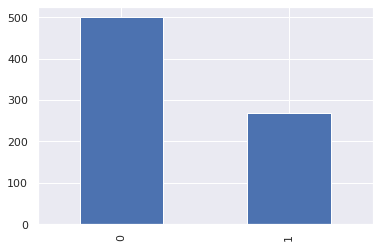

In [13]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p= df.Outcome.value_counts().plot(kind="bar")

Dataset Imbalance, pasien diabetes setengah dari pasien non diabetes

In [14]:
#df1 untuk visualisasi
df1 = df.copy()

Data Status Diabetes

In [15]:
# Menambahkan status diabetes berdasarkan dari data outcome
df1.loc[df1['Outcome'] == 1, 'Status_Diabetes'] = 'Positif'
df1.loc[df1['Outcome'] == 0, 'Status_Diabetes'] = 'Negatif'

In [16]:
data_status =df1['Status_Diabetes'].value_counts().reset_index() 
data_status.head()

,index,Status_Diabetes
0,Negatif,500
1,Positif,268


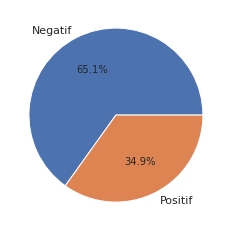

In [17]:
_ = plt.pie (x=data_status['Status_Diabetes'],labels=data_status['index'],autopct='%1.1f%%')

**Key takeaway:**
* Status diabetes : Negatif = 65.1 % , Positif = 34.9%

Data Status BMI


In [18]:
#Membuat Status_BMI
def get_bmi_Status(bmi):
  if bmi <= 18.4:
    return "low"
  elif bmi <= 25:
    return "normal"
  else:
    return "high"

df1["Status_BMI"] = df1["BMI"].apply(lambda x: get_bmi_Status(x))
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status_Diabetes,Status_BMI
0,6,148,72,35,0,33.6,0.627,50,1,Positif,high
1,1,85,66,29,0,26.6,0.351,31,0,Negatif,high
2,8,183,64,0,0,23.3,0.672,32,1,Positif,normal
3,1,89,66,23,94,28.1,0.167,21,0,Negatif,high
4,0,137,40,35,168,43.1,2.288,33,1,Positif,high


In [19]:
data_bmi=df1['Status_BMI'].value_counts().reset_index() 
data_bmi.head()

,index,Status_BMI
0,high,645
1,normal,108
2,low,15


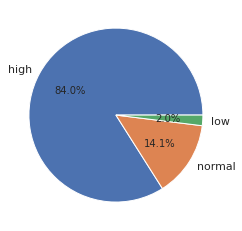

In [20]:
_ = plt.pie (x=data_bmi['Status_BMI'],labels=data_bmi['index'],autopct='%1.1f%%')

**Key takeaway:**
* Status diabetes : terdapat 645 orang dengan status BMI tinggi senilai 84% dari data

In [21]:
#Melihat hubungan status diabetes dengan status BMI
data2 = df1.groupby(['Status_BMI','Status_Diabetes'])['Outcome'].count().unstack()
data2

Status_Diabetes,Negatif,Positif
Status_BMI,,
high,386,259
low,13,2
normal,101,7


**Key takeaway:**
* Status diabetes : terdapat 259 orang positif diabetes dengan status BMI tinggi 

Data Blood Pressure

In [22]:
# Menambahkan status bloodpressure berdasarkan dari data bloodpressure
df1.loc[df1['BloodPressure'] < 59, 'Status_Bloodpressure'] = 'Low'
df1.loc[df1['BloodPressure'] > 60, 'Status_Bloodpressure'] = 'Normal'
df1.loc[df1['BloodPressure'] > 80, 'Status_Bloodpressure'] = 'High'

In [23]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status_Diabetes,Status_BMI,Status_Bloodpressure
0,6,148,72,35,0,33.6,0.627,50,1,Positif,high,Normal
1,1,85,66,29,0,26.6,0.351,31,0,Negatif,high,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Positif,normal,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Negatif,high,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Positif,high,Low


In [24]:
data_bloodpressure =df1['Status_Bloodpressure'].value_counts().reset_index() 
data_bloodpressure.head()

,index,Status_Bloodpressure
0,Normal,445
1,High,165
2,Low,121


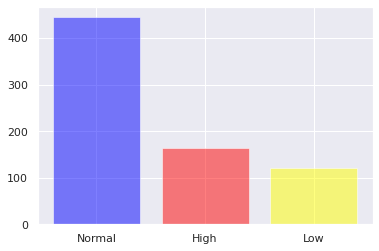

In [25]:
_=plt.bar(data_bloodpressure['index'],data_bloodpressure['Status_Bloodpressure'],color = ('blue', 'red', 'yellow'), alpha = 0.5)


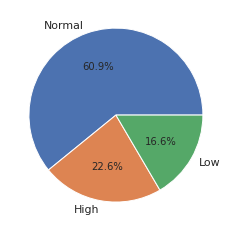

In [26]:
_ = plt.pie (x=data_bloodpressure['Status_Bloodpressure'],labels=data_bloodpressure['index'],autopct='%1.1f%%')

**Key takeaway:**
* Blood Pressure : terdapat 60.9% orang dengan blood pressure normal, Namun terdapat 22.6% memiliki blood pressure yang tinggi

In [27]:
#melihat hubungan status diabetes dengan status bloodpressure
data4 = df1.groupby(['Status_Bloodpressure','Status_Diabetes'])['Outcome'].count().unstack()
data4

Status_Diabetes,Negatif,Positif
Status_Bloodpressure,,
High,88,77
Low,89,32
Normal,293,152


Text(0.5, 1.0, 'Diabetes dengan Bloodpressure')

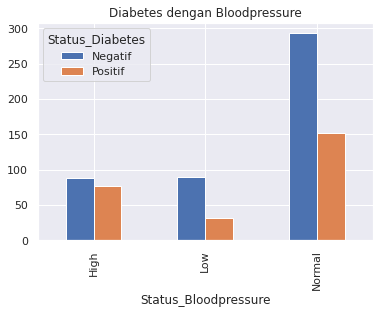

In [28]:
data4.plot(kind='bar').set_title('Diabetes dengan Bloodpressure')

**Key takeaway:**
* Blood Pressure : Status bloodpressure normal memiliki data terbanyak 

Data Glucose

In [29]:
data5 = df[(df1.Status_Diabetes == 'Positif')].filter(items=['Glucose'])
data5

,Glucose
0,148
2,183
4,137
6,78
8,197
...,...
755,128
757,123
759,190
761,170


In [30]:
data6 = df[(df1.Status_Diabetes == 'Negatif')].filter(items=['Glucose'])
data6

,Glucose
1,85
3,89
5,116
7,115
10,110
...,...
762,89
763,101
764,122
765,121


<AxesSubplot:title={'center':'Perbandingan Glukosa Diabetes Positif dan Negatif'}, xlabel='Glucose', ylabel='Density'>

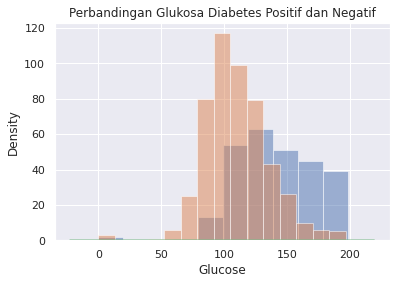

In [31]:
a = plt.hist(data5['Glucose'],bins=10,alpha=0.5)
b = plt.hist(data6['Glucose'],bins=15,alpha=0.5)
a = plt.title('Perbandingan Glukosa Diabetes Positif dan Negatif')
sns.distplot(data6.Glucose)

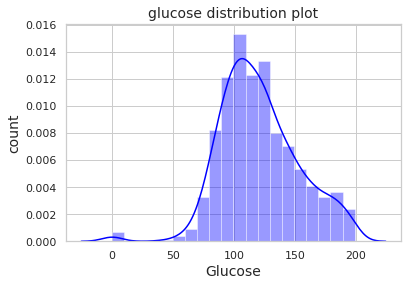

In [32]:
#distribusi glucose
sns.set(style='whitegrid')
sns.distplot(df1['Glucose'],color = 'blue',bins=20)
plt.title('glucose distribution plot',fontsize=14)
plt.xlabel('Glucose',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

**Key takeaway:**
* Glucose : Semakin tinggi glucosenya semakin tinggi didiagnosa positif diabetes

Data Skin Thickness

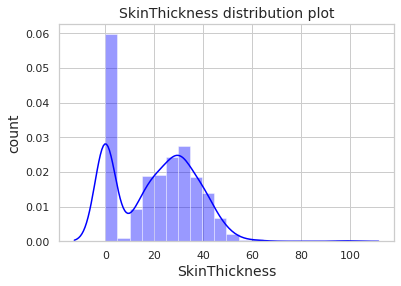

In [33]:
#Distribusi Skinthickness
sns.set(style='whitegrid')
sns.distplot(df1['SkinThickness'],color = 'blue',bins=20)
plt.title('SkinThickness distribution plot',fontsize=14)
plt.xlabel('SkinThickness',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

In [34]:
data8 = df1[(df1.Status_Diabetes == 'Positif')].filter(items=['SkinThickness'])
data8.head()

,SkinThickness
0,35
2,0
4,35
6,32
8,45


In [35]:
data9 = df1[(df1.Status_Diabetes == 'Negatif')].filter(items=['SkinThickness'])
data9.head()

,SkinThickness
1,29
3,23
5,0
7,0
10,0


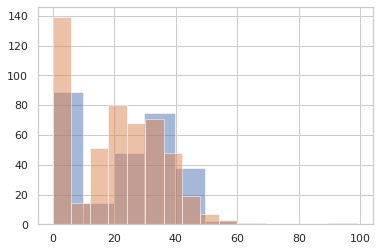

In [36]:
_ = plt.hist(data8['SkinThickness'],bins=10,alpha=0.5)
_ = plt.hist(data9['SkinThickness'],bins=10,alpha=0.5)


Data Age

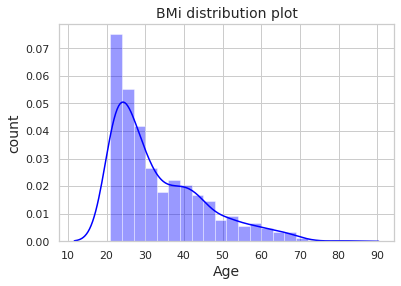

In [37]:
#Distribusi Age
sns.set(style='whitegrid')
sns.distplot(df1['Age'],color = 'blue',bins=20)
plt.title('BMi distribution plot',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

In [38]:
data10 = df1[(df1.Status_Diabetes == 'Positif')].filter(items=['Age'])
data10.head()

,Age
0,50
2,32
4,33
6,26
8,53


In [39]:
data11 = df1[(df1.Status_Diabetes == 'Negatif')].filter(items=['Age'])
data11.head()

,Age
1,31
3,21
5,30
7,29
10,30


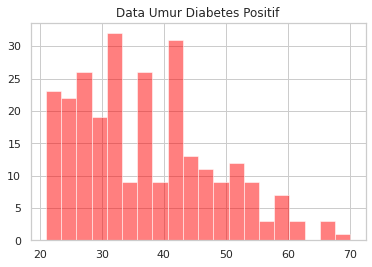

In [40]:
_ = plt.hist(data10['Age'],bins=20,alpha=0.5,color='red')
_ = plt.title('Data Umur Diabetes Positif')

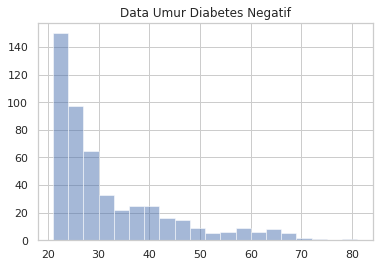

In [41]:
_ = plt.hist(data11['Age'],bins=20,alpha=0.5)
_ = plt.title('Data Umur Diabetes Negatif')

**Key takeaway:**
* Age : terdapat beberapa orang yang positif diabetes berumur diatas 30 tahun, sedangkan yang negatif diabetes berumur dibawah 30 tahun

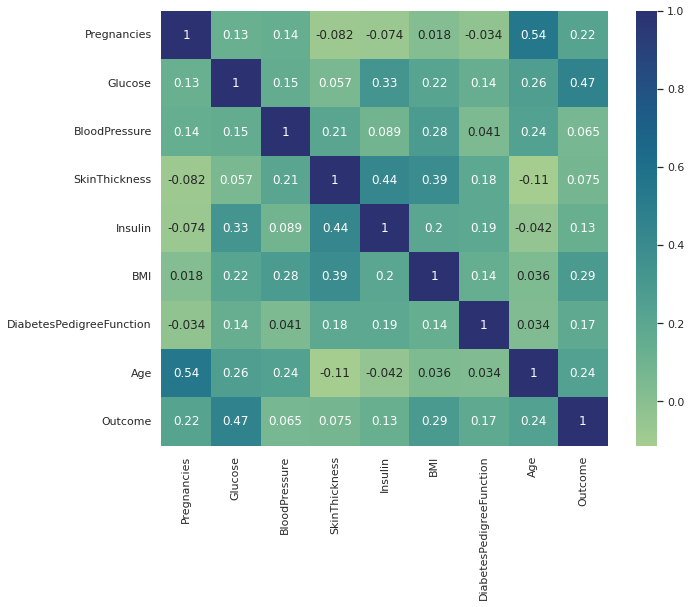

In [42]:
#Korelasi variable

plt.figure(figsize=(10,8))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap = 'crest')

**Key takeaway:**
* Korelasi : Dapat dilihat pada Outcome nilai korelasi tertinggi adalah Glucose dengan nilai 0.47, selanjutnya BMI dengan nilai 0.29 dan Age dengan nilai 0.24

# Feature Scaling


In [43]:
#Scaling Data
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [44]:
#Scaling digunakan untuk menyamakan skala variable
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [45]:
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Model Building

In [46]:
#Splitting The Dataset

X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

In [47]:
#variable independent
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [48]:
#Variable Dependent/Target
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Split test and train dataset**

In [49]:
#Data Testing Proporsi 75:25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                    random_state=8)
print(len(X_train))
print(len(X_test))

576
192


In [50]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
397,0,131.0,66.0,40.0,125.0,34.3,0.196,22
571,2,130.0,96.0,29.0,125.0,22.6,0.268,21
149,2,90.0,70.0,17.0,125.0,27.3,0.085,22
148,5,147.0,78.0,29.0,125.0,33.7,0.218,65
193,11,135.0,72.0,29.0,125.0,52.3,0.578,40
...,...,...,...,...,...,...,...,...
136,0,100.0,70.0,26.0,50.0,30.8,0.597,21
133,8,84.0,74.0,31.0,125.0,38.3,0.457,39
361,5,158.0,70.0,29.0,125.0,29.8,0.207,63
340,1,130.0,70.0,13.0,105.0,25.9,0.472,22


In [51]:
y_train

397    1
571    0
149    0
148    0
193    1
      ..
136    0
133    0
361    0
340    0
451    1
Name: Outcome, Length: 576, dtype: int64

## Model Fitting

In [52]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**Random Forest**

In [53]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
# Prediction X_test for RandomForestClassifier
y_pred1 = rf.predict(X_test)

Pred1 = pd.DataFrame(np.array(y_pred1),
                   columns=['Prediction'])
verbal=Pred1['Prediction'].map({0:'Non-diabetes', 1:'Diabetes'})
Pred1['Conclusion'] = pd.DataFrame(np.array(verbal), 
                    columns=['Conclusion'])
Pred1.head(10)


,Prediction,Conclusion
0,0,Non-diabetes
1,1,Diabetes
2,0,Non-diabetes
3,1,Diabetes
4,0,Non-diabetes
5,0,Non-diabetes
6,0,Non-diabetes
7,1,Diabetes
8,1,Diabetes
9,0,Non-diabetes


In [55]:
y_pred1 = rf.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       122
           1       0.70      0.53      0.60        70

    accuracy                           0.74       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [56]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred1)}")

Confusion Matrix: 
 [[106  16]
 [ 33  37]]


**KNN**

In [57]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred2 = knn.predict(X_test)

Pred2 = pd.DataFrame(np.array(y_pred2),
                   columns=['Prediction'])
verbal=Pred2['Prediction'].map({0:'Non-diabetes', 1:'Diabetes'})
Pred2['Conclusion'] = pd.DataFrame(np.array(verbal), 
                    columns=['Conclusion'])
Pred2.head(10)

,Prediction,Conclusion
0,0,Non-diabetes
1,1,Diabetes
2,0,Non-diabetes
3,0,Non-diabetes
4,1,Diabetes
5,0,Non-diabetes
6,0,Non-diabetes
7,1,Diabetes
8,0,Non-diabetes
9,0,Non-diabetes


In [59]:
y_pred2 = knn.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       122
           1       0.62      0.57      0.59        70

    accuracy                           0.71       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.71      0.71      0.71       192



In [60]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred2)}")

Confusion Matrix: 
 [[97 25]
 [30 40]]


**Logistic Regression**

In [61]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Prediction X_test for LogisticRegression
y_pred3 = log.predict(X_test)

Pred3 = pd.DataFrame(np.array(y_pred3),
                   columns=['Prediction'])
Pred3['Conclusion'] = pd.DataFrame(np.array(verbal), 
                    columns=['Conclusion'])
Pred3.head(10)

,Prediction,Conclusion
0,0,Non-diabetes
1,1,Diabetes
2,0,Non-diabetes
3,0,Non-diabetes
4,1,Diabetes
5,0,Non-diabetes
6,0,Non-diabetes
7,1,Diabetes
8,0,Non-diabetes
9,0,Non-diabetes


In [63]:
y_pred3 = log.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       122
           1       0.72      0.51      0.60        70

    accuracy                           0.75       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.75      0.74       192



In [64]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred3)}")

Confusion Matrix: 
 [[108  14]
 [ 34  36]]


In [65]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y_actual,  y_proba); 
    return (auc_score, fpr_df, tpr_df)

In [66]:

auc_log, fpr_log, tpr_log = get_auc_scores(y, 
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])

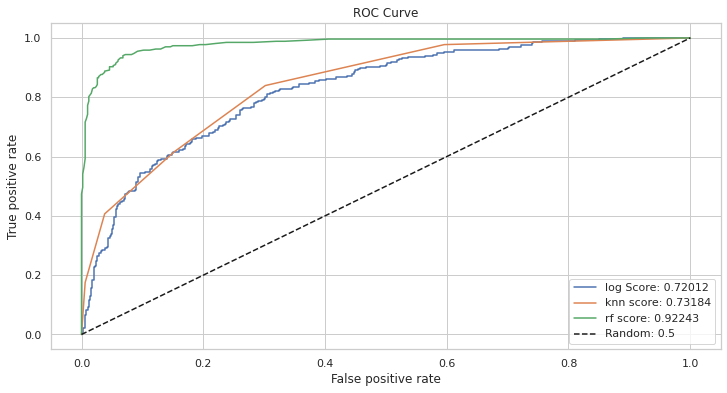

In [67]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log, tpr_log, label = 'log Score: ' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf score: ' + str(round(auc_rf, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [68]:
#Accuracy Test
predictions = rf.predict(X_test)
print("Accuracy_Score RF =", format(metrics.accuracy_score(y_test, predictions)))

predictions = knn.predict(X_test)
print("Accuracy_Score KNN =", format(metrics.accuracy_score(y_test,predictions)))

predictions = log.predict(X_test)
print("Accuracy_Score Log =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy_Score RF = 0.7447916666666666
Accuracy_Score KNN = 0.7135416666666666
Accuracy_Score Log = 0.75


**Key takeaway:**
* Dapat diketahui bahwa model yang paling cocok untuk data tersebut adalah model Random Forest Classifier

## Resampling to Handle Imbalanced Dataset

In [69]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_smote, y_smote = oversampling.fit_resample(X_train, y_train)

In [70]:
y_train.value_counts()

0    378
1    198
Name: Outcome, dtype: int64

In [71]:
y_smote.value_counts()

1    378
0    378
Name: Outcome, dtype: int64

In [72]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       122
           1       0.66      0.56      0.60        70

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



## Feature Importances

In [73]:
rf.feature_importances_

array([0.08109776, 0.25418714, 0.08437901, 0.07398024, 0.08975657,
       0.15401403, 0.12403556, 0.13854969])

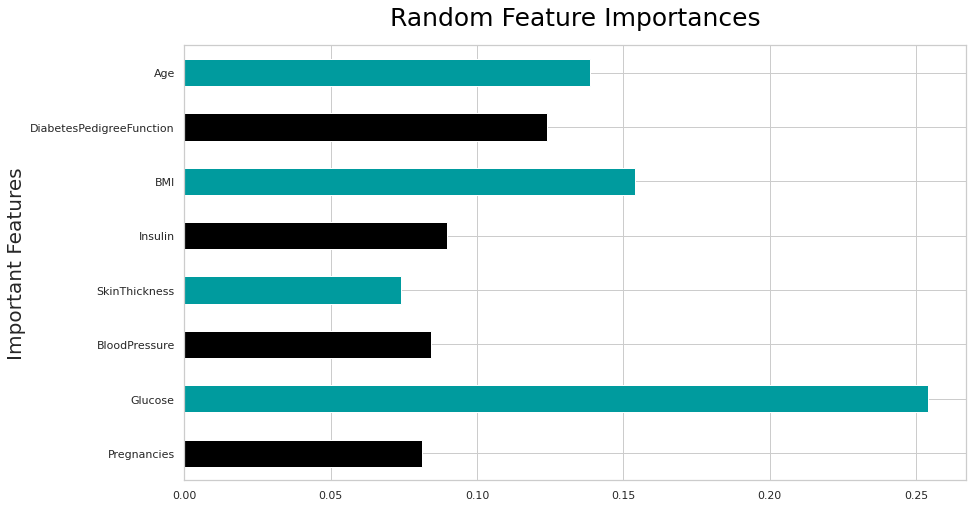

In [74]:
fig, ax = plt.subplots(figsize=(14,8))
(pd.Series(rf.feature_importances_, index=X.columns).plot(kind='barh',color=["#000000","#009b9e"]))
ax.set_ylabel("Important Features", size=20)
ax.set_title("Random Feature Importances", size=25, pad=20, color='black')
plt.show()

<AxesSubplot:>

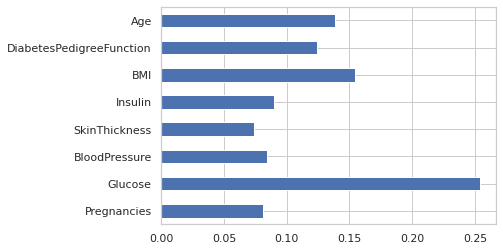

In [75]:
#Plotting feature importances
(pd.Series(rf.feature_importances_, index=X.columns)
   .plot(kind='barh'))

In [77]:
# Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_features='sqrt',min_samples_leaf=5,random_state=8).fit(X_smote,y_smote)
predictions=model.predict(X_smote)
print(confusion_matrix(y_smote,predictions))
print(accuracy_score(y_smote,predictions))
print(classification_report(y_smote,predictions))

[[340  38]
 [ 31 347]]
0.9087301587301587
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       378
           1       0.90      0.92      0.91       378

    accuracy                           0.91       756
   macro avg       0.91      0.91      0.91       756
weighted avg       0.91      0.91      0.91       756



In [170]:
#y_pred_rf

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])